In [92]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as pt
from matplotlib import rcParams
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
import sklearn.metrics as met
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [93]:
data=pd.read_excel('9.xlsx')
data.describe()

,Mean Sys,Mean Dys,F Mean Sys,F Mean Dys,0/1
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.164077,0.187585,83.412852,90.900907,0.500000
std,0.081722,0.114192,58.561292,63.894665,0.502519
min,0.015500,0.023375,6.800350,7.090855,0.000000
25%,0.098300,0.103187,38.602840,47.096954,0.000000
50%,0.179500,0.178625,76.954502,70.269132,0.500000
75%,0.219325,0.225625,109.644361,115.854000,1.000000
max,0.388250,0.635750,317.966498,303.893954,1.000000


# Split Data

In [94]:
Y = data['0/1']
X = data.drop(['0/1'], axis = 1)
x_training, x_testing, y_training, y_testing = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# KNN

In [95]:
knn = KNeighborsClassifier(n_neighbors=6)

In [96]:
knn.fit(x_training,y_training)

KNeighborsClassifier(n_neighbors=6)

In [97]:
prediction = knn.predict(x_testing)
prediction

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

Axes(0.22375,0.11;0.5775x0.77)


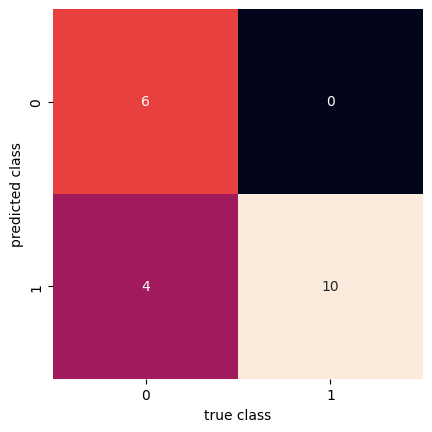

In [98]:
conmat=confusion_matrix(y_testing,prediction)
a= sns.heatmap(conmat.T, square=True, annot=True, fmt='d', cbar=False) 
pt.xlabel('true class') 
pt.ylabel('predicted class')
print(a)

In [99]:
print(classification_report(y_testing,prediction))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.71      1.00      0.83        10

    accuracy                           0.80        20
   macro avg       0.86      0.80      0.79        20
weighted avg       0.86      0.80      0.79        20



# Optimisasi K ==> maksimalkan nilai conf matrix

In [100]:
accuracy_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,data['0/1'],cv=10) #10 fold
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

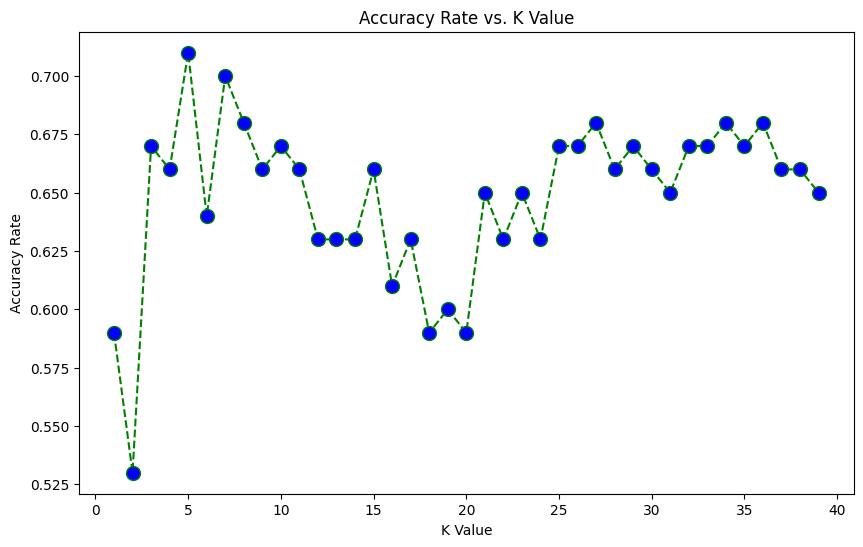

In [101]:
pt.figure(figsize=(10,6))
b= pt.plot(range(1,40),accuracy_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
pt.title('Accuracy Rate vs. K Value')
pt.xlabel('K Value')
pt.ylabel('Accuracy Rate')

In [102]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,data['0/1'],cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

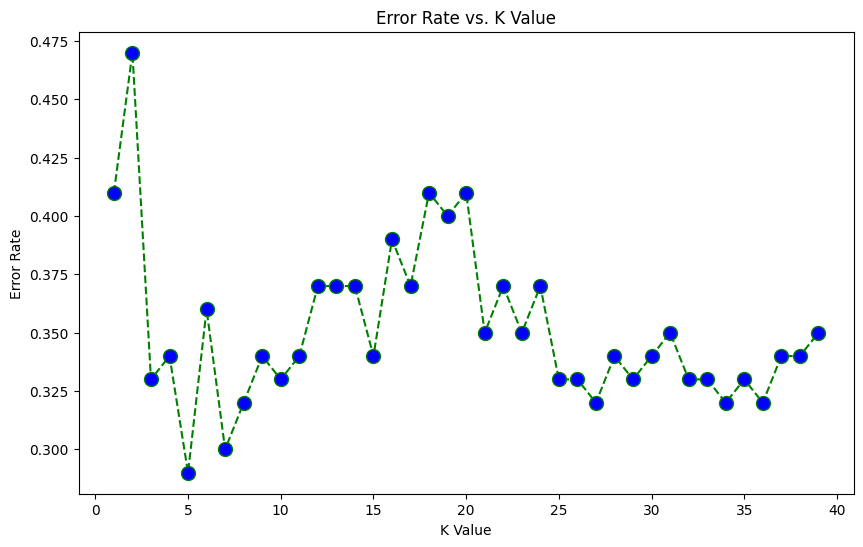

In [103]:
pt.figure(figsize=(10,6))
pt.plot(range(1,40),error_rate,color='green', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
pt.title('Error Rate vs. K Value')
pt.xlabel('K Value')
pt.ylabel('Error Rate')

In [104]:
#Untuk K=6
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(x_training,y_training)
prediction = knn.predict(x_testing)

print('WITH K=6')
print('\n')
print(confusion_matrix(y_testing,prediction))
print('\n')
print(classification_report(y_testing,prediction))
accuracyscore=met.accuracy_score(y_testing, prediction)*100
print('\n')
print('Accuracy score given for test data:',str(accuracyscore))

WITH K=6


[[ 6  4]
 [ 0 10]]


              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.71      1.00      0.83        10

    accuracy                           0.80        20
   macro avg       0.86      0.80      0.79        20
weighted avg       0.86      0.80      0.79        20



Accuracy score given for test data: 80.0
